# Linear & Polynomial Regression (Analytic)

We will explore **linear regression** and **polynomial regression** using a synthetic dataset (`synthetic_regression.csv` with columns `x, y`). All solutions must use **analytic (closed-form)** formulas — **no gradient descent, no library `.fit()`** methods. Implement everything directly in **NumPy**.

## Tasks
1. **70/30 Train–Test Split (Unregularized)**
   - Split the data into 70% train / 30% test (random, reproducible).

   - Fit the following models:
     - Linear regression (polynomial degree 1),
     - Polynomial regression with degrees $k\in \{2, 5, 10, 15\}$.

   - For each model, build the design matrix explicitly:  For each datapoint, the row is given by

     $$\Phi(x) = [1, x, x^2, \dots, x^k].$$

     (let's call the design matrix $\Phi$ instead of $X$.)

   - Solve using the equations we derived in class:

     $$\mathbf{\theta}^* = (\Phi^\top\Phi)^{-1}\Phi^\top \mathbf{y}.$$

   - Compute **training error** and **test error**.

   - Plot (a) the dataset points with all model fits on one figure, and (b) a **bar chart** of training vs test errors.

2. **10-Fold Cross-Validation (Unregularized)**
   - Implement 10-fold CV yourself (shuffle indices once, split into folds).

   - For each degree {1, 2, 5, 10, 15}, compute the **average test error** across folds.

   - Plot a **bar chart** comparing the average test error across all models. Conclude the best hypothesis class.

3. **Repeat (1) and (2) with Ridge Regularization**.
   - Use ridge regression with: $$\mathbf{\theta}^*_\lambda = (\Phi^\top\Phi + \lambda I)^{-1}\Phi^\top \mathbf{y}.$$

   - **Take $\lambda = 1$** (fixed).

   - Show the same plots: fitted curves, bar chart of train/test errors, and bar chart of 10-fold average test errors.

### Notes
- If any bar chart scale makes some bars invisible, **use a logarithmic y-axis**: `plt.yscale("log")`.
- Keep your code structured and use the provided skeleton below.



## Functions to Implement

For this assignment, you will write the following functions yourself.  
Each function connects the mathematical definition we studied in class to working NumPy code. 

---

## 1. `design_matrix_poly_1d(x_column, degree, include_bias=True)`
- Build the design matrix **Φ** for **polynomial regression**:  
  \[
  $\Phi(x) = [1, x, x^2, \dots, x^k]$
  \]
- **Input:** vector of $x$-values, degree \(k\).  
- **Output:** design matrix of shape $(n \times (k+1)$.  

---

## 2. `normal_equation(Phi, y)`
- Compute the **closed-form OLS solution**:  
  \[
  $\theta^* = (\Phi^\top \Phi)^{-1} \Phi^\top \mathbf{y}$
  \]
  (or use the pseudoinverse if singular).  
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$.  
- **Output:** regression coefficient vector $\mathbf{\theta}$.  

---

### 3. `ridge_closed_form(Phi, y, lam)`
- Compute the **ridge regression** solution:  
  \[
  $\theta^*_\lambda = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top \mathbf{y}$
  \]
- **Input:** design matrix $\Phi$, targets $\mathbf{y}$, regularization parameter $\lambda$.  
- **Output:** coefficient vector $\mathbf{\theta}$.  

---

### 4. `predict(Phi, theta)`
- Generate predictions:  
  \[
  $\hat{\mathbf{y}} = \Phi \mathbf{\theta}$
  \]
- **Input:** design matrix $\Phi$, coefficients $\mathbf{\theta}$.  
- **Output:** predicted values.  

---

### 5. `err(y_true, y_pred)`
- Compute the **average squared error**:  
  \[
  $\text{Error} = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2$ 
  \]
- **Input:** true values $\mathbf{y}$, predicted values $\mathbf{\hat{y}}$.  
- **Output:** scalar error.  

---


## Functions to use:

You can use the following functions for reading the data, doing the test-train split and also for the k-fold CV.
### 6. `kfold_indices(n, K, seed=0)`
- Generate index splits for **K-fold cross-validation**.  
- **Input:** dataset size \(n\), number of folds \(K\), optional random seed.  
- **Output:** list of `train_idx` and `val_idx` pairs.  

---

### 7. `train_test_split_indices(n, test_ratio=0.3, seed=42)`
- Randomly split dataset into **training** and **test** sets.  
- **Input:** dataset size \(n\), test ratio, optional random seed.  
- **Output:** two arrays: `train_idx`, `test_idx`.  

---

### 8. `load_csv_xy(path)`
- Load a CSV file with columns **`x`** and **`y`**.  
- **Output:**  
  - \(X\): array of shape \(n \times 1\),  
  - \(y\): vector of shape \(n\).  

---
  




  


## Starter Skeleton (fill the TODOs)
Update the CSV path to where you saved `synthetic_regression.csv`.


In [26]:
import numpy as np
import csv
import matplotlib.pyplot as plt


def design_matrix_poly_1d(x_column: np.ndarray, degree: int, include_bias: bool=True) -> np.ndarray:
    """Return Vandermonde-style design matrix [1, x, x^2, ..., x^degree]."""
    return x_column ** np.arange(degree + 1)[np.newaxis, :]


def normal_equation(Phi: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Closed-form least squares: theta = (Phi^T Phi)^{-1} Phi^T y."""
    # Note: np.linalg.pinv is used to compute Moore-Penrose pseudoinverse. If Phi^T Phi is invertible, this is equivalent to using np.linalg.inv.
    return np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ y

def ridge_closed_form(Phi: np.ndarray, y: np.ndarray, lam: float) -> np.ndarray:
    """Closed-form ridge: theta = (Phi^T Phi + λI)^{-1} Phi^T y."""
    I_d = np.eye(Phi.shape[1]) # Identity matrix of features
    return np.linalg.pinv(Phi.T @ Phi + lam * I_d) @ Phi.T @ y

def predict(Phi: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return Phi @ theta


def err(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(np.sum((y_pred - y_true)**2))

def kfold_indices(n: int, K: int, seed: int = 0):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    folds = np.array_split(idx, K)
    splits = []
    for k in range(K):
        val_idx = folds[k]
        train_idx = np.concatenate([folds[i] for i in range(K) if i != k])
        splits.append((train_idx, val_idx))
    return splits

def train_test_split_indices(n: int, test_ratio: float = 0.3, seed: int = 42):
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    n_test = int(round(test_ratio * n))
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return train_idx, test_idx

def load_csv_xy(path: str):
    xs, ys = [], []
    with open(path, "r") as f:
        rd = csv.DictReader(f)
        for row in rd:
            xs.append(float(row["x"]))
            ys.append(float(row["y"]))
    X = np.array(xs).reshape(-1, 1)
    y = np.array(ys)
    return X, y


### Load Dataset

In [21]:
X, y = load_csv_xy("synthetic_regression.csv")

### 70/30 Train-Test Split

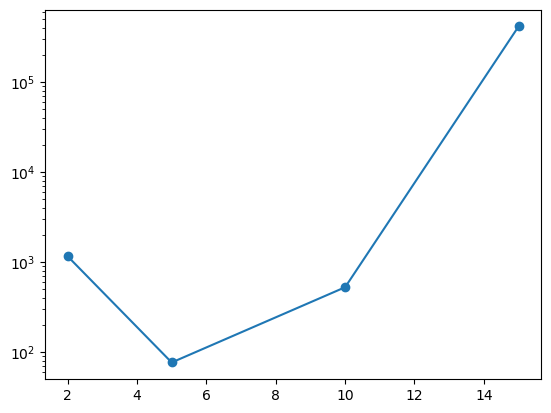

In [29]:
train_idx, test_idx = train_test_split_indices(X.shape[0])
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

degrees = [2, 5, 10, 15]

mse = []
for k in degrees:

    # Preprocessing
    Phi_train = design_matrix_poly_1d(X_train, k)
    Phi_test = design_matrix_poly_1d(X_test, k)

    # Train-test
    theta = normal_equation(Phi_train, y_train)
    y_pred = predict(Phi_test, theta)
    mse.append(err(y_test, y_pred))

plt.yscale('log')
plt.plot(degrees, mse, marker='o')
    

### 10-Fold Cross-Validation

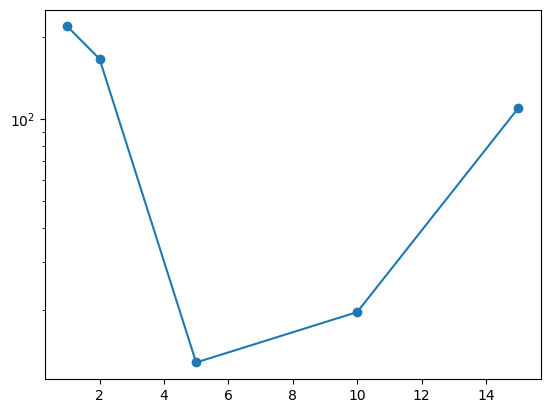

In [30]:
idxs = kfold_indices(X.shape[0], K=10)

degrees = [1,2,5,10,15]

mse_cv = []
for k in degrees:
    fold_mse = []
    # Cross-validation for kth degree polynomial
    for tidx, vidx in idxs:
        X_train, y_train = X[tidx], y[tidx]
        X_val, y_val = X[vidx], y[vidx]
        # Preprocessing
        Phi_train = design_matrix_poly_1d(X_train, k)
        Phi_val = design_matrix_poly_1d(X_val, k)
        # Train-test
        theta = normal_equation(Phi_train, y_train)
        y_pred = predict(Phi_val, theta)
        fold_mse.append(err(y_val, y_pred))
    # Store mean (average) of cv results
    mse_cv.append(np.mean(fold_mse))

plt.yscale('log')
plt.plot(degrees, mse_cv, marker='o')

### 70/30 Train-Test Split w/ Ridge

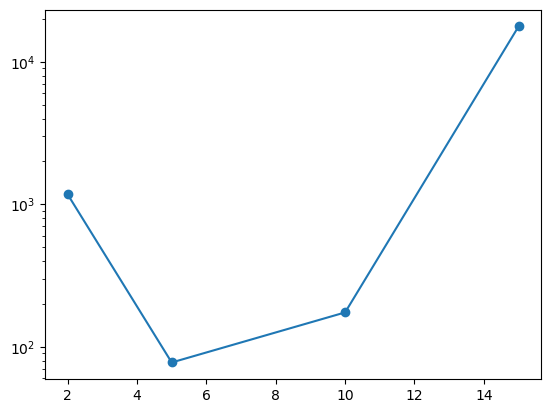

In [ ]:
train_idx, test_idx = train_test_split_indices(X.shape[0])
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

degrees = [2, 5, 10, 15]

mse = []
for k in degrees:

    # Preprocessing
    Phi_train = design_matrix_poly_1d(X_train, k)
    Phi_test = design_matrix_poly_1d(X_test, k)

    # Train-test (ridge)
    theta = ridge_closed_form(Phi_train, y_train, lam=1.0)
    y_pred = predict(Phi_test, theta)
    mse.append(err(y_test, y_pred))

plt.yscale('log')
plt.plot(degrees, mse, marker='o')

### 10-Fold Cross-Validation w/ Ridge

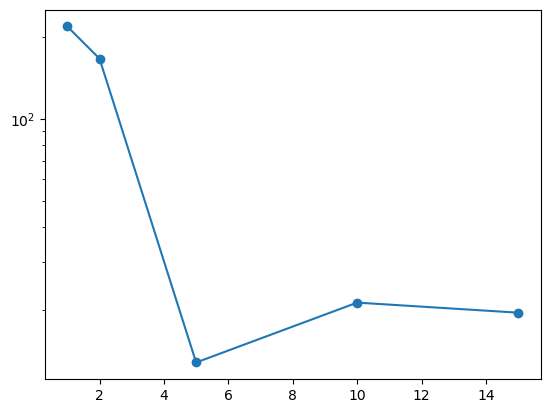

In [32]:
idxs = kfold_indices(X.shape[0], K=10)

degrees = [1,2,5,10,15]

mse_cv = []
for k in degrees:
    fold_mse = []
    # Cross-validation for kth degree polynomial
    for tidx, vidx in idxs:
        X_train, y_train = X[tidx], y[tidx]
        X_val, y_val = X[vidx], y[vidx]
        # Preprocessing
        Phi_train = design_matrix_poly_1d(X_train, k)
        Phi_val = design_matrix_poly_1d(X_val, k)
        # Train-test
        theta = ridge_closed_form(Phi_train, y_train, lam=1.0)
        y_pred = predict(Phi_val, theta)
        fold_mse.append(err(y_val, y_pred))
    # Store mean (average) of cv results
    mse_cv.append(np.mean(fold_mse))

plt.yscale('log')
plt.plot(degrees, mse_cv, marker='o')